## In this project we will use different techniques analyzing copper price data as time series. 

---

# Preparations

### Import libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.rcParams['figure.figsize'] = [10, 8]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

### Create time boundaries

Creating variables with time boundaries using the datetime library.

In [136]:
import datetime

years = 20
end_date = datetime.datetime.now()
start_date = datetime.datetime.now() - datetime.timedelta(days=years*365)

### Load the data

In [159]:
ticker = "HG=F"

data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
data = data[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


### Ploting function

In [142]:
def plot(x, y, title, xlabel, ylabel, grid_flg = True):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(grid_flg)
    
    plt.show()

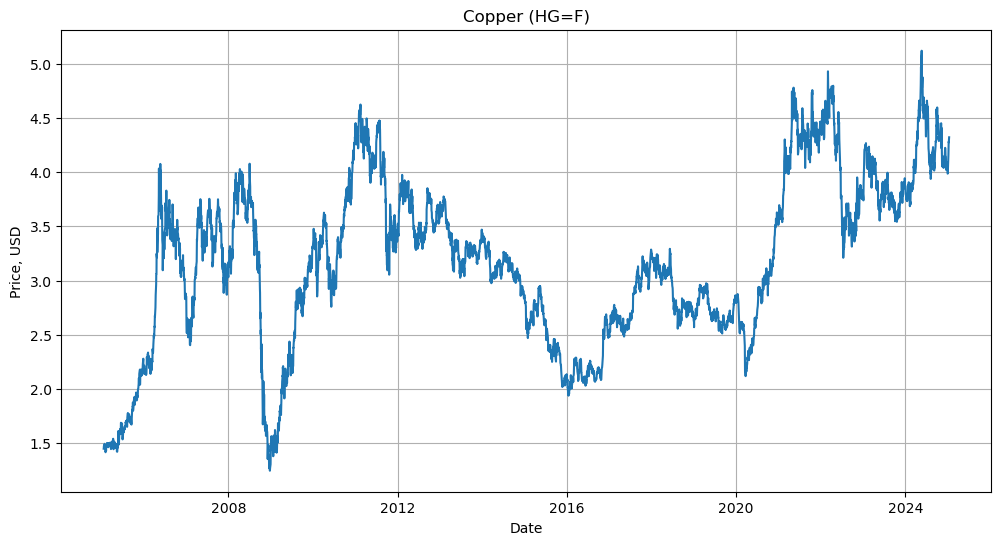

In [144]:
plot(data.index, data['Adj Close'], 'Copper (HG=F)', 'Date', 'Price, USD')

# Analysis

## Stationarity

### Differencing

In [168]:
data['Adj Close Diff'] = data['Adj Close'].diff()

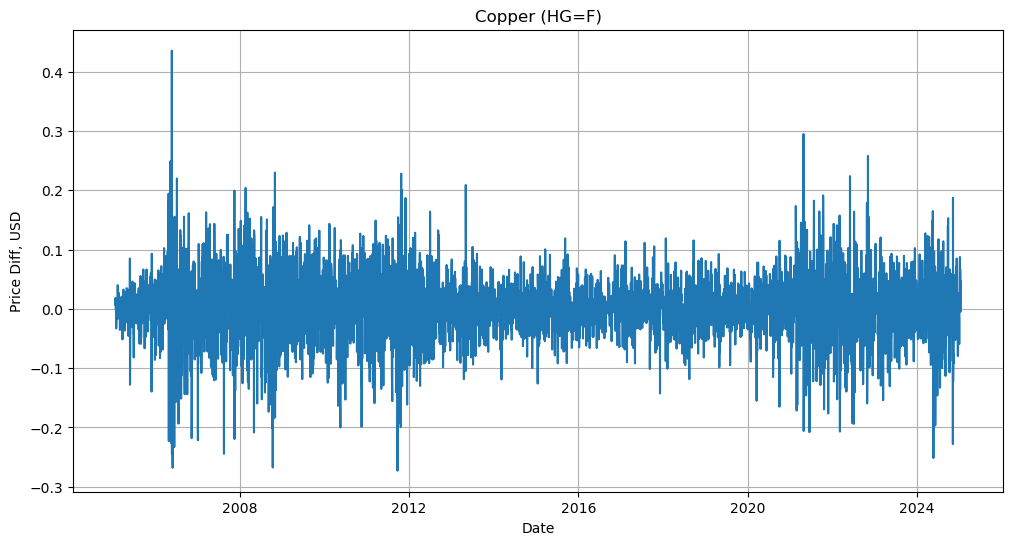

In [170]:
plot(data.index, data['Adj Close Diff'], 'Copper (HG=F)', 'Date', 'Price Diff, USD')

### ADF Test

In [177]:
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

In [181]:
adf_test(data["Adj Close"][1:])

ADF Statistic:  -2.866426769439139
P-Value:  0.04939371822159519
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


The P-value for the ADF test for the original time series is on borderline.

The original series is borderline non-stationary. It may have a unit root, but the evidence isn't conclusive.

In [179]:
adf_test(data["Adj Close Diff"][1:])

ADF Statistic:  -16.5426573872337
P-Value:  1.9774218279895223e-29
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


The P-value for the ADF test for the first difference is tiny.

The first difference is stationary, meaning thadifferencingce has removed the trend or unit root.